In [1]:
import sys
sys.path.append('../src/')

%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15, 10)

from scipy.integrate import simps
from benchmark.stats import calc_precision_recall, calc_ap

In [2]:
path = 'resnet-20220419-170643'

df = pd.read_csv('./results/{}.tsv'.format(path), sep='\t', header=0, parse_dates=["Timestamp"])
df_ap = pd.read_csv('./results/{}-ap.tsv'.format(path), sep='\t', header=0)
df_ap = df_ap.sort_values(by=['Confidence'], ignore_index=True, ascending=False)
df_load = pd.read_csv('./results/{}-load.tsv'.format(path), sep='\t', header=0, parse_dates=["Timestamp"])
df_meta = pd.read_csv('./results/{}-metadata.tsv'.format(path), sep='\t', header=0)

In [3]:
df_meta

,Python,CPU,GPUs
0,3.8.8.final.0 (64 bit),AMD Ryzen 7 2700X Eight-Core Processor,"['device: 0, name: NVIDIA GeForce GTX 1080 Ti,..."


In [4]:
df_load

,Timestamp,CPU_Load,RAM_Avail
0,2022-04-19 17:06:43.275164,3.9,7206133760
1,2022-04-19 17:06:54.292665,44.5,6758617088
2,2022-04-19 17:07:05.302666,39.5,6686429184
3,2022-04-19 17:07:16.305164,47.0,6659596288
4,2022-04-19 17:07:27.440164,45.7,6686822400
5,2022-04-19 17:07:38.544164,49.5,6640021504
6,2022-04-19 17:07:49.550166,49.9,6693957632
7,2022-04-19 17:08:00.574164,46.7,6743007232
8,2022-04-19 17:08:11.592164,43.6,6729224192
9,2022-04-19 17:08:22.603664,46.0,6751965184


In [5]:
def plot_data_over_time(time, data, label):
    plt.plot(time, data)
    plt.xlabel('Time') 
    plt.ylabel(label)
    plt.grid(True)
    plt.show()

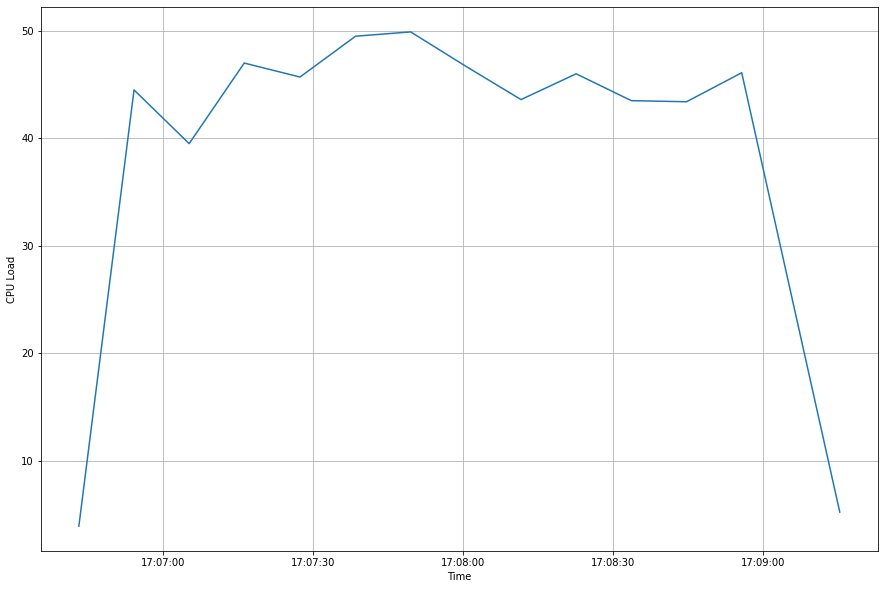

In [6]:
plot_data_over_time(df_load['Timestamp'], df_load['CPU_Load'], 'CPU Load')

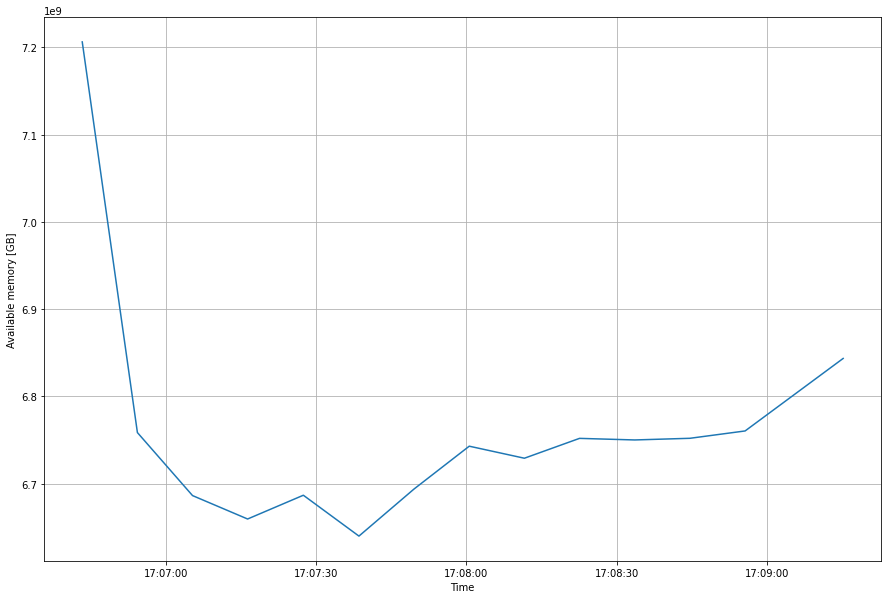

In [7]:
plot_data_over_time(df_load['Timestamp'], df_load['RAM_Avail'], 'Available memory [GB]')

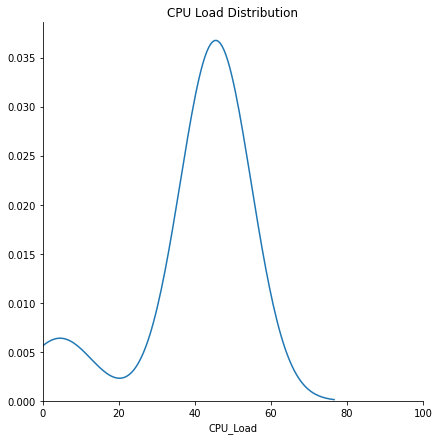

In [8]:
sns.FacetGrid(df_load, height=6).map(sns.kdeplot, 'CPU_Load').add_legend()
plt.title('CPU Load Distribution')
plt.xlim(0, 100)
plt.show()

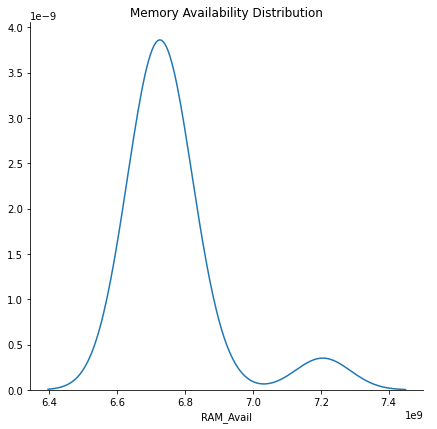

In [9]:
sns.FacetGrid(df_load, height=6).map(sns.kdeplot, 'RAM_Avail').add_legend()
plt.title('Memory Availability Distribution')
plt.show()

In [10]:
df

,Timestamp,Speed,Precision,Recall,F1_Score,Ious,Positives,False_Positives,Negatives,Num_Of_Faces,Predicted,Ground_Truth
0,2022-04-19 17:06:43.717166,29816200,1.0,0.75,0.857143,"[0.862749790594711, 0.7594473791141813, 0.8057...",6,0,2,8,"[(785.0, 184.0, 856.0, 293.0), (305.0, 145.0, ...","[(909.0, 335.0, 974.0, 418.0), (786.0, 187.0, ..."
1,2022-04-19 17:06:43.746164,23552600,0.0,0.00,0.000000,[],0,0,1,1,[],"[(547.0, 1228.0, 688.0, 1333.0)]"
2,2022-04-19 17:06:43.777166,23019100,0.0,0.00,0.000000,[0.04060947778225265],0,1,2,2,"[(471.0, 82.0, 705.0, 464.0)]","[(459.0, 45.0, 499.0, 91.0), (551.0, 107.0, 60..."
3,2022-04-19 17:06:43.881161,22592200,0.0,0.00,0.000000,[],0,0,62,62,[],"[(82.0, 278.0, 90.0, 287.0), (96.0, 272.0, 106..."
4,2022-04-19 17:06:43.919166,23048400,1.0,0.25,0.400000,"[0.7648351648351648, 0.8314950980392157]",2,0,6,8,"[(99.0, 76.0, 155.0, 141.0), (269.0, 66.0, 320...","[(104.0, 77.0, 152.0, 135.0), (199.0, 78.0, 24..."
...,...,...,...,...,...,...,...,...,...,...,...,...
3221,2022-04-19 17:09:05.092163,23261900,1.0,1.00,1.000000,[0.9069478908188585],1,0,0,1,"[(458.0, 140.0, 590.0, 333.0)]","[(452.0, 146.0, 587.0, 333.0)]"
3222,2022-04-19 17:09:05.122165,22419500,1.0,1.00,1.000000,"[0.8372409106354061, 0.8802442215438291]",2,0,0,2,"[(713.0, 405.0, 795.0, 547.0), (322.0, 406.0, ...","[(324.0, 408.0, 417.0, 524.0), (712.0, 408.0, ..."
3223,2022-04-19 17:09:05.184164,22353200,0.0,0.00,0.000000,[],0,0,27,27,[],"[(70.0, 307.0, 102.0, 343.0), (121.0, 301.0, 1..."
3224,2022-04-19 17:09:05.220665,23118700,0.0,0.00,0.000000,[],0,0,7,7,[],"[(451.0, 94.0, 478.0, 121.0), (394.0, 99.0, 40..."


In [11]:
df.describe()

,Speed,Precision,Recall,F1_Score,Positives,False_Positives,Negatives,Num_Of_Faces
count,3.226000e+03,3226.000000,3226.000000,3226.000000,3226.000000,3226.000000,3226.000000,3226.000000
mean,2.369774e+07,0.567387,0.427852,0.453423,1.050527,0.021699,11.258215,12.308741
std,1.812313e+06,0.492628,0.453465,0.452844,1.469141,0.149916,39.938891,39.822258
min,2.096610e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.249052e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2.319400e+07,1.000000,0.190909,0.320513,1.000000,0.000000,1.000000,3.000000
75%,2.432598e+07,1.000000,1.000000,1.000000,1.000000,0.000000,8.000000,9.000000
max,4.072030e+07,1.000000,1.000000,1.000000,16.000000,2.000000,709.000000,709.000000


In [12]:
df_ap

,Confidence,TP_FP@25,TP_FP@50,TP_FP@75
0,1.000000,True,True,True
1,1.000000,True,True,True
2,1.000000,True,True,True
3,1.000000,True,True,True
4,0.999999,True,True,True
...,...,...,...,...
3454,0.502187,True,True,False
3455,0.501359,True,True,True
3456,0.500528,True,True,True
3457,0.500314,False,False,False


In [13]:
all_gts = df['Positives'].sum() + df['Negatives'].sum()

df_ap = calc_precision_recall(df_ap, all_gts)

In [14]:
df_ap

,Confidence,TP_FP@25,TP_FP@50,TP_FP@75,Precision@25,Recall@25,Precision@50,Recall@50,Precision@75,Recall@75
0,1.000000,True,True,True,1.000000,0.000025,1.000000,0.000025,1.000000,0.000025
1,1.000000,True,True,True,1.000000,0.000050,1.000000,0.000050,1.000000,0.000050
2,1.000000,True,True,True,1.000000,0.000076,1.000000,0.000076,1.000000,0.000076
3,1.000000,True,True,True,1.000000,0.000101,1.000000,0.000101,1.000000,0.000101
4,0.999999,True,True,True,1.000000,0.000126,1.000000,0.000126,1.000000,0.000126
...,...,...,...,...,...,...,...,...,...,...
3454,0.502187,True,True,False,0.980029,0.085272,0.972793,0.084643,0.764978,0.066561
3455,0.501359,True,True,True,0.980035,0.085298,0.972801,0.084668,0.765046,0.066586
3456,0.500528,True,True,True,0.980040,0.085323,0.972809,0.084693,0.765114,0.066611
3457,0.500314,False,False,False,0.979757,0.085323,0.972527,0.084693,0.764893,0.066611


In [15]:
def plot_pr(df_data, title):
    ap = calc_ap(df_data['Precision@25'], df_data['Recall@25'])
    plt.plot(df_data['Recall@25'], df_data['Precision@25'], color='darkcyan', lw=3, label="AP@0.25=%.2f" % ap)
    plt.axvline(x = df_data['Recall@25'][df_data.index[-1]], ymax=df_data['Precision@25'][df_ap.index[-1]], color = 'darkcyan')
    
    ap = calc_ap(df_data['Precision@50'], df_data['Recall@50'])
    plt.plot(df_data['Recall@50'], df_data['Precision@50'], color='darkorange', lw=3, label="AP@0.5=%.2f" % ap)
    plt.axvline(x = df_data['Recall@50'][df_data.index[-1]], ymax=df_data['Precision@50'][df_ap.index[-1]], color = 'darkorange')
    
    ap = calc_ap(df_data['Precision@75'], df_data['Recall@75'])
    plt.plot(df_data['Recall@75'], df_data['Precision@75'], color='mediumorchid', lw=3, label="AP@0.75=%.2f" % ap)
    plt.axvline(x = df_data['Recall@75'][df_data.index[-1]], ymax=df_data['Precision@75'][df_ap.index[-1]], color = 'mediumorchid')
    
    plt.xlim(0, 1.00)
    plt.ylim(0, 1.00)

    plt.title(title)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc="lower right", prop={'size': 16})
    plt.grid(True)

    plt.show()

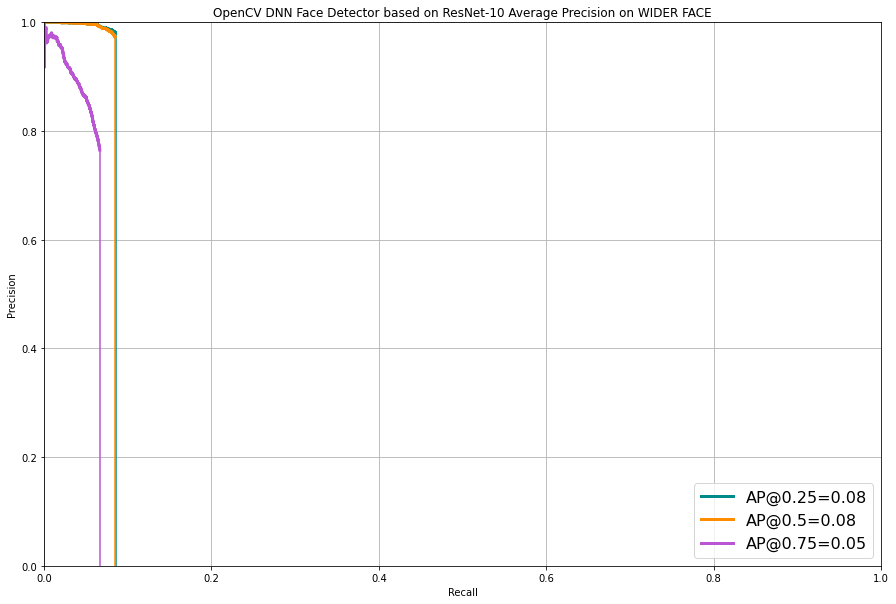

In [16]:
plot_pr(df_ap, 'OpenCV DNN Face Detector based on ResNet-10 Average Precision on WIDER FACE')